In [74]:
import pandas as pd 
import zipfile 
import os.path 
import xlrd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/jfrank/ml/data/'mm

In [68]:
sx ls '/Users/jfrank/ml/data/'

['2017Q1-capitalbikeshare-tripdata.csv',
 '2017Q2-capitalbikeshare-tripdata.csv',
 '2017Q3-capitalbikeshare-tripdata.csv',
 '2017Q4-capitalbikeshare-tripdata.csv',
 'HADS GLMED Errors.xlsx',
 'HUD median incomes 1985-2009.xlsx',
 'HUDMedianIncomes1985-2009.zip',
 'HUD_median_incomes_1985-2009.xlsx',
 'HUD_median_incomes_1985-2009.xlsxHUD_median_incomes_1985-2009..csv',
 'HUD_median_incomes_1985-2009.xlsxHUD_median_incomes_1985-2009.csv',
 'ReadMe.docx',
 'data_goes_here.txt',
 'hads2011(ASCII).zip',
 'hads2013m_SAS.zip',
 'hads2013n_SAS.zip',
 'project',
 'project.zip',
 'thads2011.txt']

In [69]:
password = "housing23" # ask the instructor for the password

def unzip(filename):
    with zipfile.ZipFile(os.path.join(path, filename)) as zf:
        file_list = zf.namelist()
        zf.extractall(path=path, pwd=bytes(password, "utf-8"))


In [4]:
def xlsx_to_csv(path, filename):
    fullpath = os.path.join(path, filename)
    df_xlsx = pd.read_excel(fullpath)
    df_xlsx.to_csv(fullpath + filename[:-5] + '.csv', encoding='utf-8', index=False)
    new_path = fullpath + filename[:-5] + '.csv'
    df = pd.read_csv(new_path)
    return df

In [5]:
filename = "HUD_median_incomes_1985-2009.xlsx"
hud_income_df = xlsx_to_csv(path, filename)
hud_income_df.head(5)

,IN09_SMSA,MSA_Codebook,MSA,IN85_HUDMED,IN87_HUDMED,IN89_HUDMED,IN91_HUDMED,IN93_HUDMED,IN95_HUDMED,IN97_HUDMED,IN99_HUDMED,IN01_HUDMED,IN03_HUDMED,IN05_HUDMED,IN07_HUDMED,IN09_HUDMED
0,80,"0080 Akron, OH",80,29450,31500,34800,40000,40100,41300,44300,49900,54100,60300,60700,60300.00,65000.00
1,160,"0160 Albany-Schenectady-Troy, NY",160,27450,29500,32800,37500,43800,43800,47000,49700,53000,59800,63450,63500.00,70816.67
2,200,"0200 Albuquerque, NM",200,26350,29700,32100,34600,37600,38300,44400,46100,49000,51400,54200,55900.00,59500.00
3,240,"0240 Allentown-Bethlehem-Easton, PA",240,28550,31100,33700,38600,43000,43000,45800,49400,52000,59700,60650,65800.00,70000.00
4,460,"0460 Appleton-Oshkosh-Neenah, WI",460,28650,31400,34600,40500,42400,43500,47600,53700,58000,61700,64300,66033.33,70300.00


In [6]:
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2011(ASCII).zip'
national_file = 'thads2011.txt'

z_national = urlopen(national_url)
zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
df_national_2011 = pd.read_csv(zip_national)

In [27]:
df_national_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145531 entries, 0 to 145530
Data columns (total 99 columns):
CONTROL                145531 non-null object
AGE1                   145531 non-null int64
METRO3                 145531 non-null object
REGION                 145531 non-null object
LMED                   145531 non-null int64
FMR                    145531 non-null int64
L30                    145531 non-null int64
L50                    145531 non-null int64
L80                    145531 non-null int64
IPOV                   145531 non-null int64
PER                    145531 non-null int64
ZINC2                  145531 non-null int64
ZADEQ                  145531 non-null object
ZSMHC                  145531 non-null int64
STATUS                 145531 non-null object
WEIGHT                 145531 non-null float64
BEDRMS                 145531 non-null int64
BUILT                  145531 non-null int64
TYPE                   145531 non-null int64
VALUE                  1455

In [8]:
df_national_2011.head(5)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'036000001146',34,'2','4',84200,2580,24950,41550,66500,17849,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'
1,'036000001147',43,'2','4',84200,2241,27700,46150,73850,22629,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
2,'036000001149',60,'2','4',84200,2577,24950,41550,66500,17399,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
3,'036000001150',37,'2','4',84200,2241,22200,36950,59100,14985,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'
4,'036000001151',33,'2','4',84200,2580,27700,46150,73850,22557,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'


In [7]:
df_national_2011['REGION_NAME'] = 'NaN'
df_national_2011.loc[df_national_2011['REGION'] == "'1'", 'REGION_NAME'] = 'Northeast'
df_national_2011.loc[df_national_2011['REGION'] == "'2'", 'REGION_NAME'] = 'Midwest'
df_national_2011.loc[df_national_2011['REGION'] == "'3'", 'REGION_NAME'] = 'South'
df_national_2011.loc[df_national_2011['REGION'] == "'4'", 'REGION_NAME'] = 'West'

df_national_2011

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS,REGION_NAME
0,'036000001146',34,'2','4',84200,2580,24950,41550,66500,17849,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
1,'036000001147',43,'2','4',84200,2241,27700,46150,73850,22629,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
2,'036000001149',60,'2','4',84200,2577,24950,41550,66500,17399,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
3,'036000001150',37,'2','4',84200,2241,22200,36950,59100,14985,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
4,'036000001151',33,'2','4',84200,2580,27700,46150,73850,22557,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5',West
5,'036000001152',42,'2','4',84200,1327,19400,32350,51700,11674,...,'6 100 - 120% AMI','6 100 - 120% AMI','6 100 - 120% AMI','6 100 - 120% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','West','-5',West
6,'036000001153',45,'2','4',84200,2241,24950,41550,66500,18012,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','2 30 - 50% AMI','.','3 50% or More','West','-5',West
7,'036000001154',35,'2','4',84200,2241,27700,46150,73850,22557,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
8,'036000001155',50,'2','4',84200,2577,29950,49850,79800,26385,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West
9,'036000001156',38,'2','4',84200,2577,32150,53550,85700,29815,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5',West


In [48]:
df_national_2011_copy = df_national_2011.copy()
len(df_national_2011_copy.columns)

100

In [52]:
df_national_2011_copy = df_national_2011_copy.loc[:, df_national_2011_copy.columns.isin(['AGE', 'AGE1', 'REGION', 'REGION_NAME', 'LMED', 'GLMED', 'METRO', 'METRO3', 'FMR', 'BUILT', 'APLMED'])]
print(df_national_2011_copy.columns)

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'BUILT', 'GLMED', 'APLMED',
       'REGION_NAME'],
      dtype='object')


In [54]:
df_corr_matrix = df_national_2011_copy.corr()

In [70]:
print(df_corr_matrix)

            AGE1      LMED       FMR     BUILT     GLMED    APLMED
AGE1    1.000000  0.021761  0.087153 -0.019574  0.021761  0.408925
LMED    0.021761  1.000000  0.615924 -0.089250  1.000000  0.502939
FMR     0.087153  0.615924  1.000000  0.040470  0.615924  0.484047
BUILT  -0.019574 -0.089250  0.040470  1.000000 -0.089250  0.003730
GLMED   0.021761  1.000000  0.615924 -0.089250  1.000000  0.502939
APLMED  0.408925  0.502939  0.484047  0.003730  0.502939  1.000000


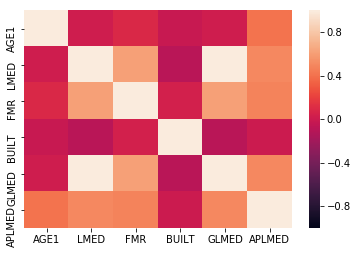

In [78]:
sns.heatmap(df_corr_matrix, vmin= -1, vmax = 1, 
            xticklabels=df_corr_matrix.columns.values,
            yticklabels=df_corr_matrix.columns.values)